In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:

node_names = np.load("nodes_names.npy")     


In [3]:
names = []
for i in range(1,12):
    names.append(list(np.load('name'+str(i)+'.npy')))

In [4]:
z1 = np.load("z1.npy")
z2 = np.load("z2.npy")
# z3 = np.load("z3.npy")
# z4 = np.load("z4.npy")
# z5 = np.load("z5.npy")
# z6 = np.load("z6.npy")

In [5]:
membership = np.load("pi.npy")
membership = membership!='D'

In [6]:
time_point = []
start_idx = 0
for arr in names:
    time_point.append(np.arange(start_idx, start_idx + len(arr)))
    start_idx += len(arr)

In [7]:
def find_match(l1, l2):
    l1_dict = {l1[i]: i for i in range(len(l1))}
    l2_dict = {l2[i]: i for i in range(len(l2))}
    match = []
    for key in l1_dict:
        if key in l2_dict:
            match.append([l1_dict[key], l2_dict[key]])
    return match

In [8]:
select_index = []
for i in range(11):
    match = find_match(list(node_names),list(names[i]))
    _,pos = np.array(match).T
    assert(len(match)==207)
    index_t = time_point[i][pos]
    select_index.append(time_point[i][pos])

In [9]:
select = np.concatenate(select_index)

In [10]:
z2_compare = z2[select]
# z4_compare = z4[select]
# z6_compare = z6[select]

In [11]:
def soft_align(z_hat,z_true):
    R, sca = linalg.orthogonal_procrustes(z_hat,z_true)
    return z_hat@R

In [12]:
def normalize(z):
    return z/np.linalg.norm(z)

In [13]:
# z_temp = soft_align(z5,z1)/2+soft_align(z3,z1)/2
# z2_compare = z1
# z1 = z_temp

In [14]:
np.save('z2_compare.npy',z2_compare)

In [15]:
np.mean(z2_compare,axis=0)

array([1.367949 , 1.5833299], dtype=float32)

In [16]:

# z2_compare = soft_align(z6_compare,z4_compare)/3+soft_align(z2_compare,z4_compare)/3+z4_compare/3
# z2_compare = normaliz
z1 = z1-np.mean(z1,axis=0)
z2_compare = z2_compare-np.mean(z2_compare,axis=0)
z2_compare= normalize(soft_align(z2_compare,z1))
z1 = normalize(z1)

In [17]:
mean1=[]
mean2=[]
for i in range(11):
    mean1.append(np.sum(z1[i*207:(i+1)*207][membership],axis=0))
    mean2.append(np.sum(z2_compare[i*207:(i+1)*207][membership],axis=0))

In [18]:
mean3=[]
mean4=[]
for i in range(11):
    mean3.append(np.sum(z1[i*207:(i+1)*207][membership==False],axis=0))
    mean4.append(np.sum(z2_compare[i*207:(i+1)*207][membership==False],axis=0))

In [19]:
def plot_compare(data1,data2,title=None):
    data = data1
    
    head_width = min(np.var(data1)**0.5/25,np.var(data2)**0.5/25)

    # Create a scatter plot
    fig, ax = plt.subplots()
    ax.scatter(data[:,0], data[:,1],c='darkred',label='Set 1')

    for i in range(len(data)):
        ax.annotate(str(10+i), (data[i][0]+0.0, data[i][1]+0.0))
    
    for i in range(len(data)-1):
        ax.arrow(data[i][0], data[i][1], data[i+1][0]-data[i][0], data[i+1][1]-data[i][1],
             width=0.00001,alpha=0.5,head_width=head_width,length_includes_head=True)


    data = data2
    ax.scatter(data[:,0], data[:,1],c='skyblue',label='Set 2')
    for i in range(len(data)):
        ax.annotate(str(10+i), (data[i][0]+0.0, data[i][1]+0.0))
        
    for i in range(len(data)-1):
        ax.arrow(data[i][0], data[i][1], data[i+1][0]-data[i][0], data[i+1][1]-data[i][1],
             width=0.00001,alpha=0.5,head_width=head_width,length_includes_head=True)


    plt.legend()

    # Add labels and title
    ax.set_xlabel(r'$Z_1$')
    ax.set_ylabel(r'$Z_2$')
    ax.set_title(title)

    # Display the plot
    plt.show()

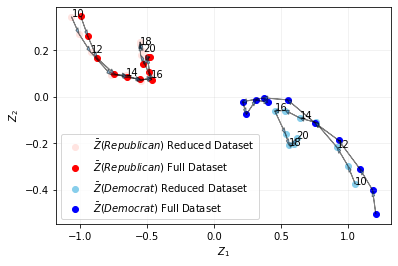

In [20]:

# Create a scatter plot
fig, ax = plt.subplots()


data = np.array(mean1)
head_width = min(np.var(data)**0.5/25,np.var(data)**0.5/25)
ax.scatter(data[:,0], data[:,1],c='mistyrose',label=r'$\bar{Z}(Republican)$ Reduced Dataset')

for i in range(len(data)):
    if i%2 ==0:
        ax.annotate(str(10+i), (data[i][0]+0.0, data[i][1]+0.0))

for i in range(len(data)-1):
    ax.arrow(data[i][0], data[i][1], data[i+1][0]-data[i][0], data[i+1][1]-data[i][1],
         width=0.00001,alpha=0.5,head_width=head_width,length_includes_head=True)


data = np.array(mean2)
ax.scatter(data[:,0], data[:,1],c='red',label=r'$\bar{Z}(Republican)$ Full Dataset')
# for i in range(len(data)):
#     ax.annotate(str(10+i), (data[i][0]+0.0, data[i][1]+0.0))

for i in range(len(data)-1):
    ax.arrow(data[i][0], data[i][1], data[i+1][0]-data[i][0], data[i+1][1]-data[i][1],
         width=0.00001,alpha=0.5,head_width=head_width,length_includes_head=True)

data = np.array(mean3)
ax.scatter(data[:,0], data[:,1],c='skyblue',label=r'$\bar{Z}(Democrat)$ Reduced Dataset')
for i in range(len(data)):
    if i%2 ==0:
        ax.annotate(str(10+i), (data[i][0]+0.0, data[i][1]+0.0))

for i in range(len(data)-1):
    ax.arrow(data[i][0], data[i][1], data[i+1][0]-data[i][0], data[i+1][1]-data[i][1],
         width=0.00001,alpha=0.5,head_width=head_width,length_includes_head=True)

    
data = np.array(mean4)
ax.scatter(data[:,0], data[:,1],c='blue',label=r'$\bar{Z}(Democrat)$ Full Dataset')
# for i in range(len(data)):
#     ax.annotate(str(10+i), (data[i][0]+0.0, data[i][1]+0.0))

for i in range(len(data)-1):
    ax.arrow(data[i][0], data[i][1], data[i+1][0]-data[i][0], data[i+1][1]-data[i][1],
         width=0.00001,alpha=0.5,head_width=head_width,length_includes_head=True)
    
    
plt.legend()
plt.grid(True,alpha=0.2)

# Add labels and title
ax.set_xlabel(r'$Z_1$')
ax.set_ylabel(r'$Z_2$')
# ax.set_title(title)


# Display the plot
plt.show()

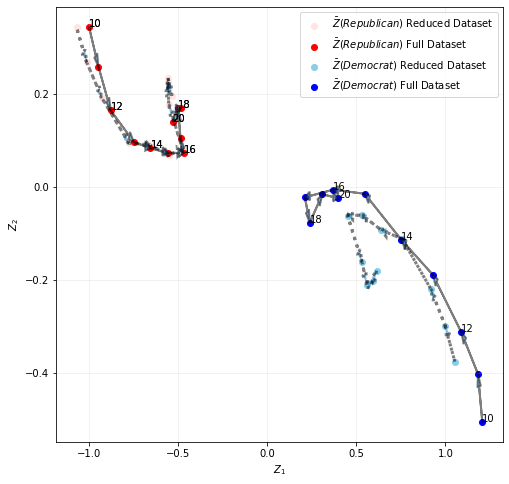

In [37]:

# Create a scatter plot
fig, ax = plt.subplots(figsize=(8, 8))

data = np.array(mean1)
head_width = min(np.var(data)**0.5/25,np.var(data)**0.5/25)
ax.scatter(data[:,0], data[:,1],c='mistyrose',label=r'$\bar{Z}(Republican)$ Reduced Dataset')

# for i in range(len(data)):
#     if i%2 ==0:
#         ax.annotate(str(10+i), (data[i][0]+0.0, data[i][1]+0.0))

for i in range(len(data)-1):
    ax.arrow(data[i][0], data[i][1], data[i+1][0]-data[i][0], data[i+1][1]-data[i][1],
         width=0.00001,alpha=0.5,linestyle=':',linewidth=3,head_width=head_width,length_includes_head=True)


data = np.array(mean2)
ax.scatter(data[:,0], data[:,1],c='red',label=r'$\bar{Z}(Republican)$ Full Dataset')
# for i in range(len(data)):
#     ax.annotate(str(10+i), (data[i][0]+0.0, data[i][1]+0.0))
for i in range(len(data)):
    if i%2 ==0:
        ax.annotate(str(10+i), (data[i][0]+0.0, data[i][1]+0.0))

for i in range(len(data)-1):
    ax.arrow(data[i][0], data[i][1], data[i+1][0]-data[i][0], data[i+1][1]-data[i][1],
         width=0.00001,alpha=0.5,linewidth=2,head_width=head_width,length_includes_head=True)
for i in range(len(data)):
    if i%2 ==0:
        ax.annotate(str(10+i), (data[i][0]+0.0, data[i][1]+0.0))

    
data = np.array(mean3)
ax.scatter(data[:,0], data[:,1],c='skyblue',label=r'$\bar{Z}(Democrat)$ Reduced Dataset')

for i in range(len(data)-1):
    ax.arrow(data[i][0], data[i][1], data[i+1][0]-data[i][0], data[i+1][1]-data[i][1],
         width=0.00001,alpha=0.5,linestyle=':',linewidth=3,head_width=head_width,length_includes_head=True)

    
data = np.array(mean4)
ax.scatter(data[:,0], data[:,1],c='blue',label=r'$\bar{Z}(Democrat)$ Full Dataset')
# for i in range(len(data)):
#     ax.annotate(str(10+i), (data[i][0]+0.0, data[i][1]+0.0))

for i in range(len(data)-1):
    ax.arrow(data[i][0], data[i][1], data[i+1][0]-data[i][0], data[i+1][1]-data[i][1],
         width=0.00001,alpha=0.5,linewidth=2,head_width=head_width,length_includes_head=True)
for i in range(len(data)):
    if i%2 ==0:
        ax.annotate(str(10+i), (data[i][0]+0.0, data[i][1]+0.0))
    
    
plt.legend()
plt.grid(True,alpha=0.2)

# Add labels and title
ax.set_xlabel(r'$Z_1$')
ax.set_ylabel(r'$Z_2$')
# ax.set_title(title)


# Display the plot
plt.show()

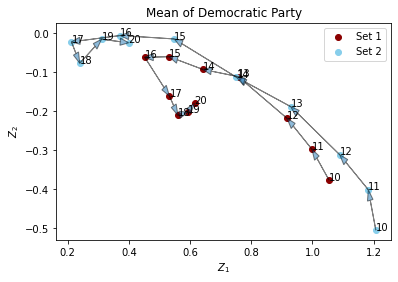

In [21]:
plot_compare(np.array(mean3),np.array(mean4),'Mean of Democratic Party')

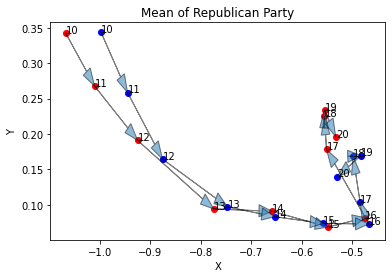

In [21]:
plot_compare(np.array(mean1),np.array(mean2),'Mean of Republican Party')

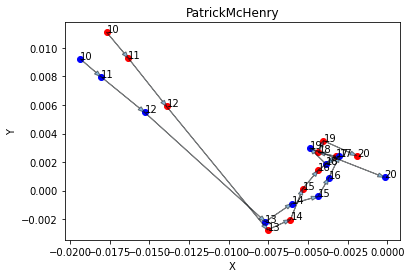

In [22]:
start = 82
actor = np.arange(start, start + 207 * 11, 207)
data1 = z2_compare[actor]
data2 = z1[actor]
plot_compare(data1,data2,node_names[start])

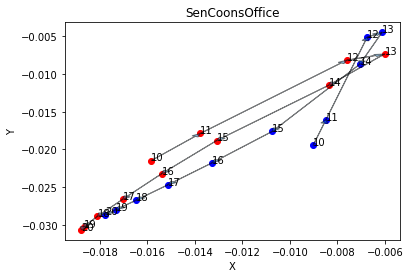

In [23]:
start = 103
actor = np.arange(start, start + 207 * 11, 207)
data1 = z2_compare[actor]
data2 = z1[actor]
plot_compare(data1,data2,node_names[start])

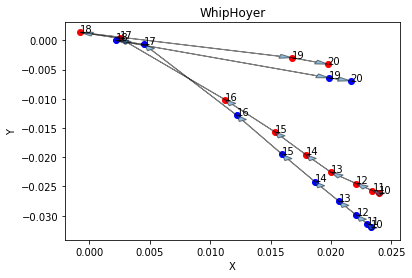

In [24]:
start = 2
actor = np.arange(start, start + 207 * 11, 207)
data1 = z2_compare[actor]
data2 = z1[actor]
plot_compare(data1,data2,node_names[start])

In [25]:
np.linalg.norm(z2_compare-z1)/np.linalg.norm(z1)

0.2626664

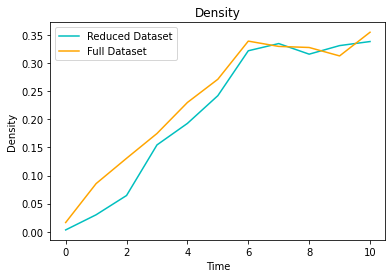

In [31]:
import matplotlib.pyplot as plt

# Sample data
x = list(range(11))
y1 = [0.003283148069977956,
 0.030204962243797196,
 0.06449040851742413,
 0.15449556775010553,
 0.19276769382299141,
 0.24210871910323156,
 0.32198302143426666,
 0.33478729890718073,
 0.3159326485624502,
 0.33117583603020495,
 0.33839876178415645]
y2 = [0.016435409962362268,
 0.0856692201269373,
 0.13066954034337427,
 0.174812614847292,
 0.22999224376731303,
 0.2713090331922477,
 0.33915311292465944,
 0.3297333193526965,
 0.3278167222567697,
 0.31282151290268173,
 0.354934755146788]


# Plot the first line in red
plt.plot(x, y1, 'c', label='Reduced Dataset')

# Plot the second line in blue
plt.plot(x, y2, 'orange', label='Full Dataset')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Density')
plt.title('Density')
plt.legend()

# Show the plot
plt.show()

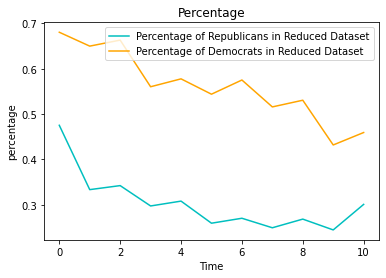

In [32]:
import matplotlib.pyplot as plt

# Sample data
x = list(range(11))
y1 = 77/np.array([162, 231, 225, 259, 250, 297, 285, 309, 287, 315, 256])
y2 = 130/np.array([191, 200, 196, 232, 225, 239, 226, 252, 245, 301, 283])


# Plot the first line in red
plt.plot(x, y1, 'c', label='Percentage of Republicans in Reduced Dataset')

# Plot the second line in blue
plt.plot(x, y2, 'orange', label='Percentage of Democrats in Reduced Dataset')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('percentage')
plt.title('Percentage')
plt.legend()

# Show the plot
plt.show()